In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray ,gray2rgb
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk, binary_erosion, binary_dilation
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.draw import circle

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

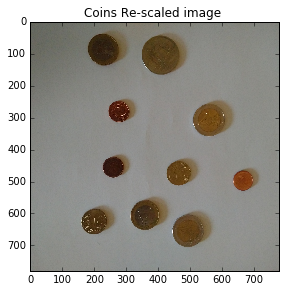

In [2]:
Path = './images/'  #Adding Path of the image
image_name = 'coins.jpg'  #Image name 
coins_image = imread(Path.__add__(image_name)) #Reading the image
coins_image_ubyte = img_as_ubyte(coins_image)  #Image as Ubyte
coins_image_scaled = rescale(coins_image_ubyte,1/4) # Rescaling image by 4


imshow(coins_image_scaled)  #Displaying the image 
plt.title('Coins Re-scaled image ')

Subsquently, threshold the image skimage.morphology.using a global Otsu's thresholding after converting the image into gray scale. Display the image.

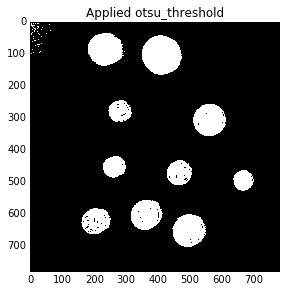

In [3]:
gray_coins_img=rgb2gray(coins_image_scaled) #Gray scale Conversion 
plt.figure() 
imshow(gray_coins_img) #Displaying the image


global_threshold = threshold_otsu(gray_coins_img) #applying threshiold_otsu function
otsu_threshold = gray_coins_img <= global_threshold  #Setting threshold 
imshow(otsu_threshold) #Showing the image 
plt.title('Applied otsu_threshold')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

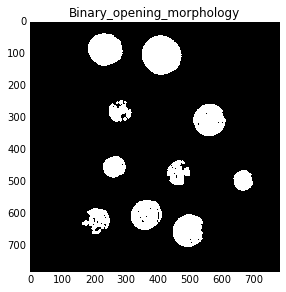

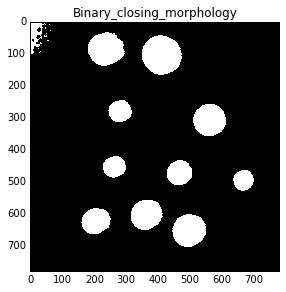

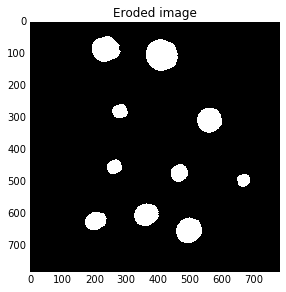

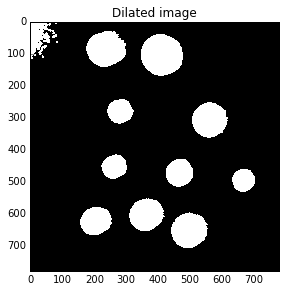

In [4]:

slem = disk(4) #Setting disk size 4x4 for erosion
slem2 = disk (12)  #Setting disk size 2x2 for dilation

#Applying Different Morphological operations
binary_opening_morphology = binary_opening(otsu_threshold,slem , out = None)
binary_closing_morphology = binary_closing(otsu_threshold,slem , out = None)
erosion = binary_erosion(binary_closing_morphology,slem2 , out = None)
dilation = binary_dilation(otsu_threshold,slem , out = None)


#Plottig binary_opening_morphology
plt.figure()
imshow(binary_opening_morphology)
plt.title('Binary_opening_morphology')


#Plottig binary_closing_morphology
plt.figure()
imshow(binary_closing_morphology)
plt.title('Binary_closing_morphology')


#Plottig eroded image
plt.figure()
imshow(erosion)
plt.title('Eroded image')


#Plottig dilated image
plt.figure()
imshow(dilation)
plt.title('Dilated image')



Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

/home/wajahat/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


Numer of total regions are : 10 


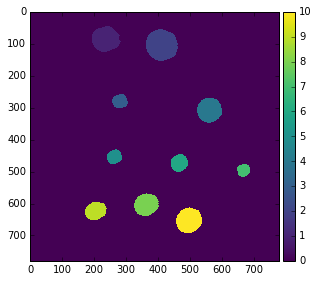

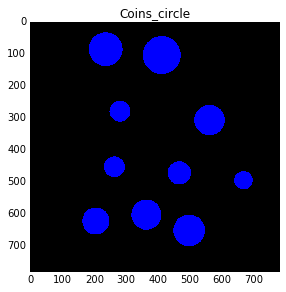

In [5]:
from skimage.measure import label, regionprops
labelled_image , Number_regions  = label(erosion , return_num= True ,connectivity=1)

plt.figure()
imshow(labelled_image)  
print ("Numer of total regions are : %d " %Number_regions) #10 regions found


region_image = regionprops(labelled_image) 
#[rr, cc] = region_image[1].centroid
Coins_circle = gray2rgb(img_as_ubyte(erosion))


for label in region_image:
    for j in range(9): 
        [rr,cc] = circle(
            float(label["centroid"][0]), 
            float(label["centroid"][1]), 
            float(label["major_axis_length"]/2)+j
        )

        Coins_circle[rr,cc] = (0,0,255) #Coloring the circle 

        
        #[rr,cc]=region_image[0]['centroid']
        
plt.figure()
imshow(Coins_circle)
plt.title("Coins_circle")




## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

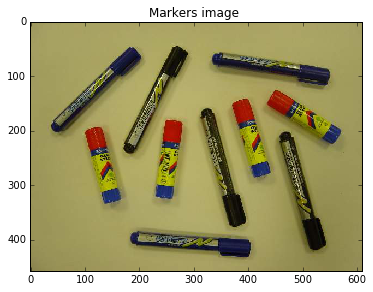

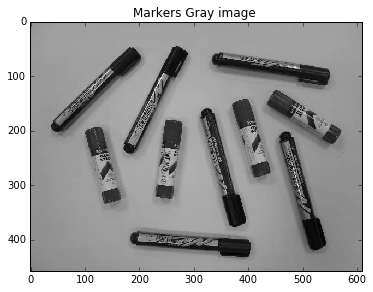

In [6]:
from skimage.measure import label, regionprops

Path = './images/'  #Adding Path of the image
image_name = 'objets4.jpg'  #Image name 
markers_image = imread(Path.__add__(image_name)) #Reading the image

plt.figure()
imshow(markers_image)  #Displaying the image 
plt.title('Markers image ')


markers_image_ubyte = img_as_ubyte(markers_image)  #Image as Ubyte
markers_gray_image = rgb2gray(markers_image_ubyte)

plt.figure()
imshow(markers_gray_image)  #Displaying the image 
plt.title('Markers Gray image ')


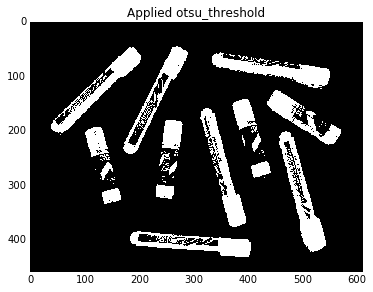

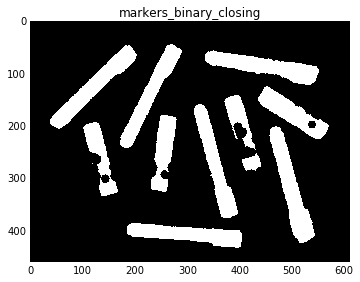

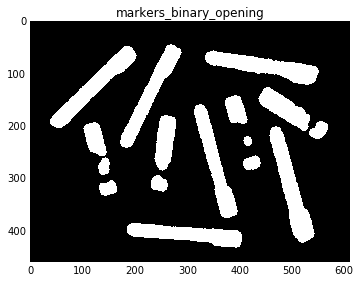

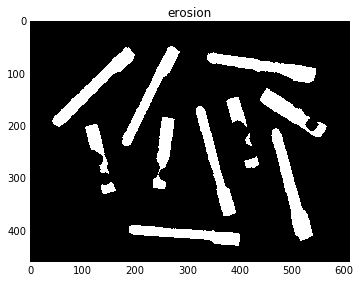

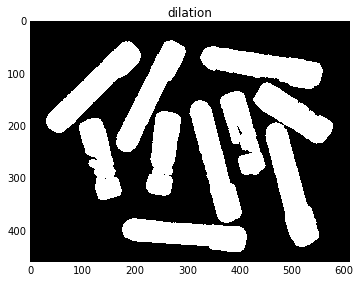

In [7]:
markers_global_threshold = threshold_otsu(markers_gray_image) #applying threshiold_otsu function
markers_otsu_threshold = markers_gray_image < global_threshold  #Setting threshold 
imshow(markers_otsu_threshold) #Showing the image 
plt.title('Applied otsu_threshold')


slem = disk(8)
slem2 = disk(4)
markers_binary_closing = binary_closing(markers_otsu_threshold,slem )
markers_binary_opening = binary_opening(markers_binary_closing, slem)    
erosion2 = binary_erosion(markers_binary_closing,slem2 , out = None)
dilation2 = binary_dilation(markers_otsu_threshold,slem , out = None)

plt.figure()
plt.title("markers_binary_closing")
imshow(markers_binary_closing)

plt.figure()
plt.title("markers_binary_opening")
imshow(markers_binary_opening)

plt.figure()
plt.title("erosion")
imshow(erosion2)

plt.figure()
plt.title("dilation")
imshow(dilation2)






In [8]:
labelled_region, number = label(dilation2,return_num=True)
region_props = regionprops(labelled_region)
print("Total number of object are : %d" %number)

number_markers = 0
number_glue = 0

for i in region_props:
    if(i["area"] > 575): #checking by area
        if(i["eccentricity"] > 0.96): #eccentricity of 0.98 - 0.99
            number_markers += 1
        else: 
            number_glue += 1


print("The number of markers are : %d"%number_markers)
print("The number of gum are : %d"%number_glue)


Total number of object are : 10
The number of markers are : 6
The number of gum are : 4


In [ ]:
#Hence markers detected are of the same number as in the image we just have to adjust the area and ecentricity 